In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(338,500)]
i =0
result = np.zeros((162,62))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn330-500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        #plotvar = plotvar[:,200:400,700:1000]
        plotvar = plotvar[:,247:365,800:1100]
        plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=1)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
result.shape

(162, 62)

In [5]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/depth.nc')
C = data1.variables['z_t'][:]/100
B = C

In [23]:
A = np.arange(470)
#B = np.arange(50)
xx, yy = np.meshgrid(B, A)

In [7]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'17'}
nice_levels = [34.64,34.65,34.66,34.67,34.68,34.69,34.7,34.71,34.72,34.73]

In [8]:
#b= np.load(file="data150-330.npy")

In [9]:
result1 = np.zeros((180,62))
i=0

In [10]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        plotvar = plotvar[:,247:365,800:1100]
        plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=1)
        result1[i,:] = aveplot[:]
        
        i = i + 1

In [11]:
b= result1

In [12]:
b.shape

(180, 62)

In [13]:
#mid= np.load(file="salt330-338.npy")

In [14]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(330,338)]
i =0
mid = np.zeros((8,62))

In [15]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SALT_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[:,247:365,800:1100]
        plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=1)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        mid[i] = aveplot
        
        i = i + 1
#********************************************************************

In [16]:
 #mid = np.zeros((10,62))

In [17]:
#mid[mid == 0]=np.nan

In [18]:
dd = np.vstack((b,mid))

In [19]:
ddd = np.vstack((dd,result))

In [20]:
ddd.shape

(350, 62)

In [21]:
ddd.shape

(350, 62)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'interpolation'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


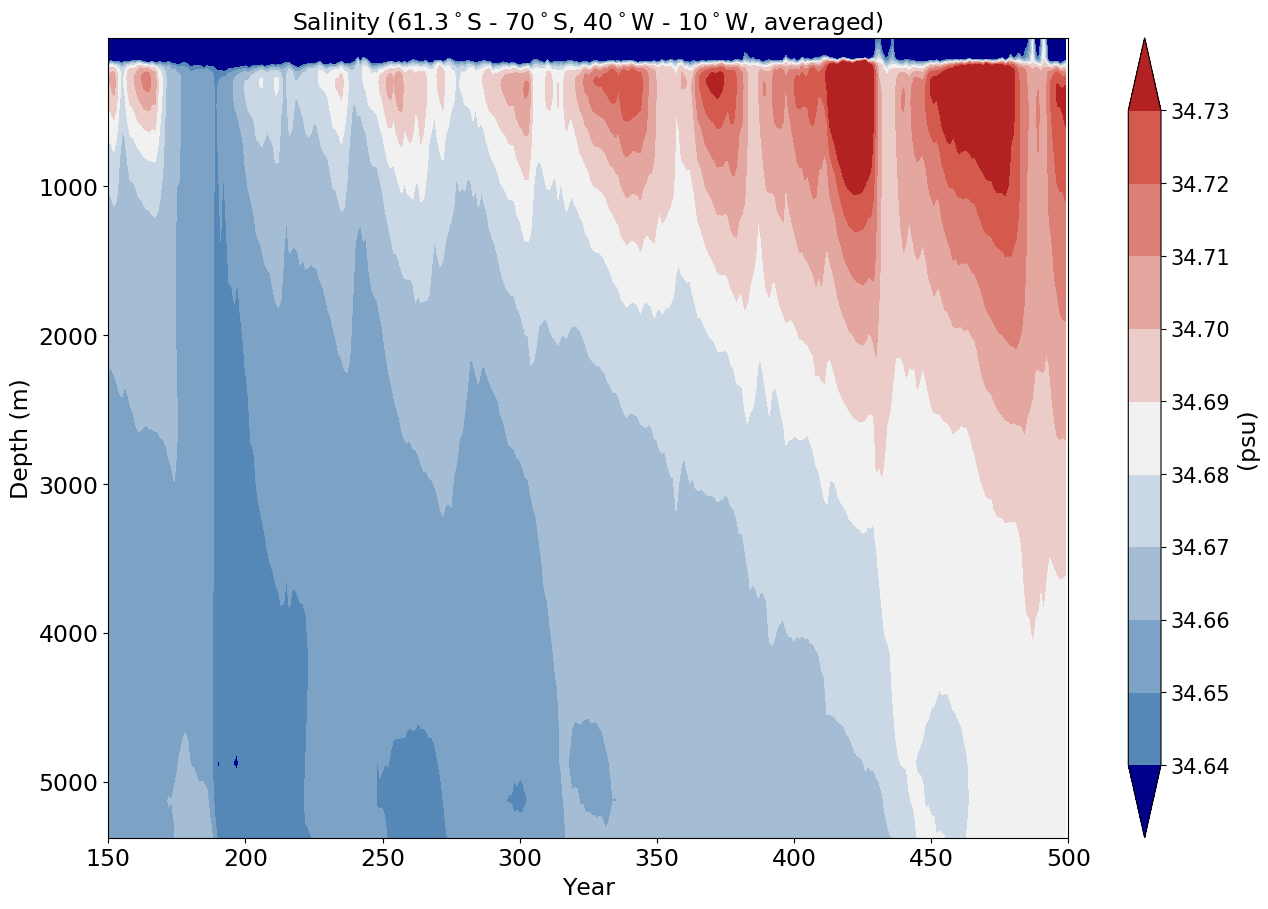

In [24]:
#t = np.arange(0,540,3)
# plot the result
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#ax0 = plt.subplot(2,1,1)
im = ax0.contourf(yy[120:,:60], xx[120:,:60], ddd[:,:60],levels = nice_levels,cmap=nice_cmap,interpolation='none',extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#CS = ax0.contour(yy,xx,result, [0.8],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=10)
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
#cbar.minorticks_on()
cbar.set_label('(psu)', **my_font)
ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
plt.xticks(range(120,471,50), ['150', '200', '250', '300', '350','400', '450', '500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Year',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Salinity (61.3$^\circ$S - 70$^\circ$S, 40$^\circ$W - 10$^\circ$W, averaged)',**my_font)
plt.savefig("salt-dep2.png",bbox_inches='tight',dpi=fig.dpi)

In [25]:
np.save(file="saldepthallnew.npy", arr=ddd[:,:60])